##**Deep Learning Example - Iris**

#1. Setup

In [ ]:
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

#2. Input Pre-processing

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Load Iris Dataset
data1 = pd.read_csv("Iris.csv")
print(data1.shape)

data = data1.iloc[:,1:6]
print(data.shape)

print("\nLoading Data:\n...................")
print(data.head())

#Use Label Encoder to convert text Species to numeric data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])

#converting data to numpy array
np_data = data.to_numpy()

#Splitting Dataset
X_data = np_data[:,0:4]
Y_data = np_data[:,4]

print("\nFeatures Before Scaling:\n")
print(X_data[:5, :])
print("\nTarget Before Scaling:\n")
print(Y_data[:5])

#Create a Standard Scale for each of the variable(Feature)
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

print("\nFeatures After Scaling:\n")
print(X_data[:5, :])
print("\nTarget After Scaling:\n")
print(Y_data[:5])

#Splitting as test train data's
X_train, X_test, Y_train,Y_test = train_test_split(X_data, Y_data, test_size = 0.10)

print("\nTrain Test Dimension\n.........................")
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(150, 6)
(150, 5)

Loading Data:
...................
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Features Before Scaling:

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target Before Scaling:

[0. 0. 0. 0. 0.]

Features After Scaling:

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]

Target After Scaling:

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [

#3. Model Creation

In [ ]:
from tensorflow import keras

#Number of target classes -> 3
CLASSES = 3

#Creating a sequential model
model = tf.keras.models.Sequential()

#Hidden Layer 1
model.add(keras.layers.Dense(128,                     #nodes
                             input_shape = (4, ),     #number of features
                             name = "Hidden_Layer_1", #name of the layer
                             activation = "relu"))    #activation func

#Hidden Layer 2
model.add(keras.layers.Dense(128,                     #nodes
                             input_shape = (128, ),   #number of inputs from prev layer
                             name = "Hidden_Layer_2", #name of the layer
                             activation = "relu"))    #activation func

#Output Layer
model.add(keras.layers.Dense(CLASSES,                 #nodes
                             input_shape = (128, ),   #number of inputs from prev layer
                             name = "Output_Layer",   #name of the layer
                             activation = "softmax")) #activation func

#compile with metrics
model.compile(loss = "categorical_crossentropy",metrics = ["accuracy"])

#Summary of the model
model.summary()

# Parameter Counting
# Any Layer     : inputs*number_of_nodes + number_of_nodes
# also          : inputs*weights + bias
# Hidden Layer 1: 4*128 + 128 = 640
# Hidden Layer 2: 128*128 + 128 = 16512
# Output Layer  : 128*3 + 3 = 387

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

#4. Training and Evaluation


Training Progress:
.......................................
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8717 - loss: 0.2664 - val_accuracy: 1.0000 - val_loss: 0.1421
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9135 - loss: 0.2236 - val_accuracy: 0.9630 - val_loss: 0.1206
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9266 - loss: 0.2314 - val_accuracy: 1.0000 - val_loss: 0.1080
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9694 - loss: 0.1896 - val_accuracy: 1.0000 - val_loss: 0.0962
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9477 - loss: 0.1819 - val_accuracy: 0.9259 - val_loss: 0.1022
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9600 - loss: 0.1587 - val_accuracy: 0.9630 - val_loss: 0.0843
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9516 - loss: 0.1540 - val_accuracy: 1.0000 - val_loss: 0.0730
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9123

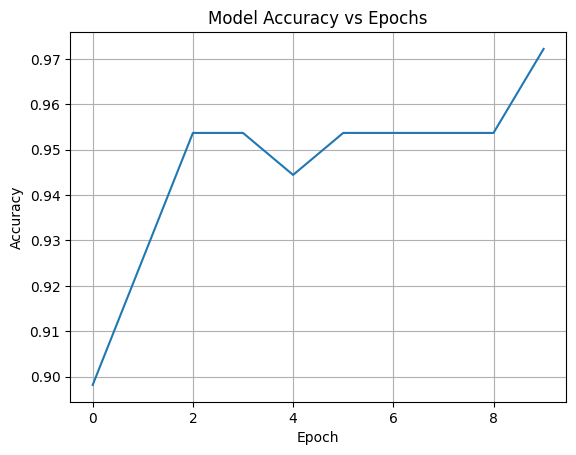


Evaluation against Test Dataset:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0877


[0.08773309737443924, 1.0]

In [ ]:
# Make it verbose so we can see the progress
VERBOSE = 1

# Setting up Hyper Parameters
BATCH_SIZE = 16
EPOCHS = 10
# 20% of the training data will be used for Validation
VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n.......................................")

# Training the model
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training:\n...........")

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Evaluate
print("\nEvaluation against Test Dataset:\n")
model.evaluate(X_test, Y_test)

#Here,
# Total dataset dimension rows = 150 samples
# of which 90:10 = train:test -> for test, it is 90% of 150 = 135
# Next, 80:20 = actual_train:validation -> for actual_test, it is 80% of 135 = 108
# Also, the batch size  = 16 -> ceil(108/6) = 7


#5. Saving a Model

In [ ]:
model.save("iris_saved_model.h5")

#Loading a model
load_model = keras.models.load_model("iris_saved_model.h5")

#Print Model Summary
load_model.summary()

#Evaluate
load_model.evaluate(X_test,Y_test)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,541 (68.52 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step - accuracy: 1.0000 - loss: 0.0877


[0.08773309737443924, 1.0]

#6. Prediction using the model

In [ ]:
#Raw Prediction data
input = [[6.6, 3., 4.4, 1.4]]

#Scaling the input
scaled_input = scaler.transform(input)

prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probalilities): ", prediction)

prediction = np.argmax(prediction,axis = 1)
print("Predicted Class is: ", le.inverse_transform([prediction]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Raw Prediction Output (Probalilities):  [[0.0021589  0.8608182  0.13702296]]
Predicted Class is:  ['Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
